# TP3 :  Réaliser une ACM pour deux variables qualitatives ("hair" et "eyes")

#### Réalisé par : 
- Assouli imad eddine
- Lachhab mossab
- Chrit adam


In [87]:
import pandas as pd
import numpy as np
import itertools
from scipy . stats import chi2_contingency
import seaborn as sns ;
sns.set()
import matplotlib.pyplot as plt


In [88]:
#les variables qualitatives

hair = ["Chatains","Roux","Blonds"]
eyes = ["Marrons","Noisettes","Verts","Bleus"]


In [89]:
data = pd.read_csv(r"C:\Users\Ahmed\Desktop\TPAnalyseDonnees\TP3.csv", index_col=0)

In [90]:
data = data[hair]

In [91]:
print(data)

          Chatains  Roux  Blonds
Marrons        119    26       7
Noisette        54    14      10
verts           29    14      16
bleus           84    17      94


In [92]:
#convertir a numpay array

finalData = data.to_numpy()

In [93]:
#calculer la somme des effectifs du tableau de données
sommeTotal =np.sum(finalData)

In [94]:
#diviser la matrice des effectifs par la somme total pour avoir la matrice de correspondance
correspondenceMatrix = np.divide ( finalData , sommeTotal )

In [95]:
#creer la matrice d'independance qui est le produit de la somme marginale des lignes (vecteur colonne) par la somme marginale de colonnes (vecteur ligne)
#somme maginale des lignes
rowTotals = np.sum ( correspondenceMatrix , axis =1)
#somme maginale des colonnes
columnTotals = np . sum ( correspondenceMatrix , axis =0)
#maintenant on calcule la matrice d'independance
independenceMatrix = np.outer ( rowTotals , columnTotals )

In [96]:
#calculer la Matrice d’écart à l’indépendance
ecartIndep = np.divide(( correspondenceMatrix -independenceMatrix ) , np.sqrt( independenceMatrix ) )

In [97]:
#creer la matrice d'independance qui est le produit de la somme marginale des lignes (vecteur colonne) par la somme marginale de colonnes (vecteur ligne)
#somme maginale des lignes
rowTotals = np.sum ( correspondenceMatrix , axis =1)
#somme maginale des colonnes
columnTotals = np . sum ( correspondenceMatrix , axis =0)
#maintenant on calcule la matrice d'independance
independenceMatrix = np.outer ( rowTotals , columnTotals )

In [98]:
#decomposition la Matrice d’écart à l’indépendance en matrice des vecteurs propres
RowMatrix,ValPropresMatrix , ColumnMatix = np . linalg . svd ( ecartIndep , full_matrices =False )
print("matrice des vecteurs propres lignes",RowMatrix)
print("matrice des vecteurs propres colonnes",ColumnMatix)
print("matrice des valeurs propres",ValPropresMatrix)
#obtension des valeurs propres a partir de ces matrices
#valeurs propres lignes
VpLigne = np.zeros((RowMatrix.shape [0] , RowMatrix.shape [1]))
for i in range (RowMatrix.shape[0]) :
    VpLigne[i] = np.divide( RowMatrix[i] , np.sqrt( rowTotals[i]))
#valeurs propres colonnes
VpCol = np.zeros((ColumnMatix.shape [0] , ColumnMatix.shape[1]))
for i in range(ColumnMatix.shape[0]):
    VpCol[i] = np.divide(ColumnMatix[i], np.sqrt(columnTotals[i]))
print("les valeurs propres lignes",VpLigne)
print("les valeurs propres colonnes",VpCol)

matrice des vecteurs propres lignes [[-0.62942851  0.31149598 -0.71167467]
 [-0.27996163 -0.0619783   0.24337251]
 [ 0.01463709 -0.91044686 -0.41017653]
 [ 0.72472546  0.26498199 -0.51579473]]
matrice des vecteurs propres colonnes [[-0.45576996 -0.23387532  0.85882249]
 [ 0.44873673 -0.89364877 -0.00521839]
 [-0.76870611 -0.38300681 -0.51224671]]
matrice des valeurs propres [4.37528903e-01 1.03342834e-01 2.61304363e-17]
les valeurs propres lignes [[-1.12317465  0.55584453 -1.26993764]
 [-0.69738707 -0.15438853  0.60624322]
 [ 0.0419229  -2.60766188 -1.17480958]
 [ 1.14177071  0.4174666  -0.81261021]]
les valeurs propres colonnes [[-0.59290534 -0.30424543  1.11723125]
 [ 1.17161554 -2.33324512 -0.0136248 ]
 [-1.50065602 -0.74769989 -1.        ]]


In [99]:
#calculer les coordonnées des lignes et des colonnes
rowCoordinates = np.dot ( VpLigne , np.diag ( ValPropresMatrix) )
print("les coordonnees lignes",rowCoordinates)
colCoordinates = np.dot ( VpCol , np.diag ( ValPropresMatrix ) )
print("les coordonnees colonnes",colCoordinates)

les coordonnees lignes [[-4.91421374e-01  5.74425495e-02 -3.31840247e-17]
 [-3.05126999e-01 -1.59549487e-02  1.58413998e-17]
 [ 1.83424824e-02 -2.69483169e-01 -3.06982868e-17]
 [ 4.99557684e-01  4.31421817e-02 -2.12338592e-17]]
les coordonnees colonnes [[-2.59413224e-01 -3.14415850e-02  2.91937399e-17]
 [ 5.12615660e-01 -2.41124164e-01 -3.56022015e-19]
 [-6.56580383e-01 -7.72694252e-02 -2.61304363e-17]]


IndexError: index 3 is out of bounds for axis 0 with size 3

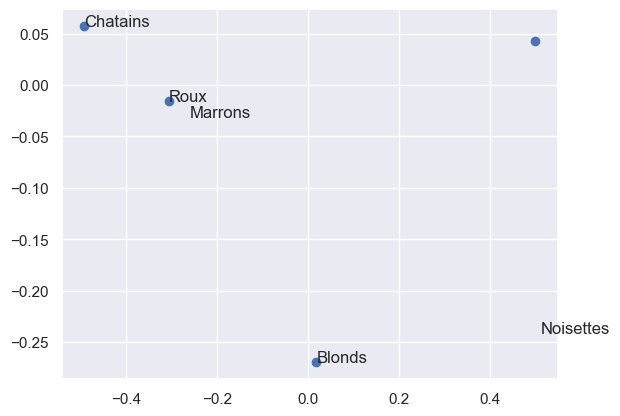

In [100]:
plt.scatter(rowCoordinates[:,0], rowCoordinates[:,1])
for i, label in enumerate(hair):
    plt.annotate(label, (rowCoordinates[i,0], rowCoordinates[i,1]))
for i, label in enumerate(eyes):
    plt.annotate(label, (colCoordinates[i,0], colCoordinates[i,1]))
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Scatter plot of hair and eye color")
plt.show()









IndexError: list index out of range

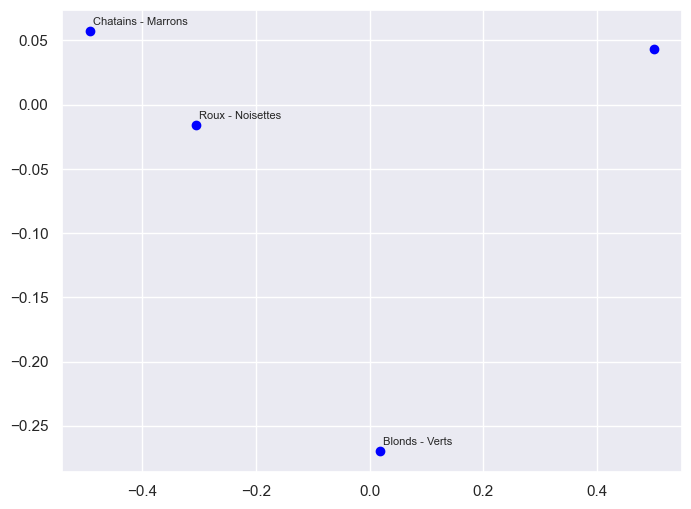

In [ ]:

# afficher le nuage de points avec les étiquettes "hair" et "eyes"
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(rowCoordinates)):
    ax.scatter(rowCoordinates[i, 0], rowCoordinates[i, 1], color='blue')
    ax.text(rowCoordinates[i, 0] + 0.005, rowCoordinates[i, 1] + 0.005, f'{hair[i]} - {eyes[i]}', fontsize=8)

ax.set_title("Nuage de points avec les variables qualitatives hair et eyes")
ax.set_xlabel("Cp 1")
ax.set_ylabel("Cp 2")
plt.show()